(sampling-distr-mean-notebook)=
# Distribuzione campionaria della media e test t di Student

In [55]:
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns


In [56]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set_theme(
    context="paper",
    palette="colorblind"
)
az.style.use("arviz-darkgrid")

L'inferenza frequentista si basa sul concetto fondamentale della distribuzione campionaria di una statistica. Nel tutorial presente, ci concentreremo sulla statistica della "media del campione". L'obiettivo principale è quello di costruire l'intera distribuzione campionaria della statistica della "media del campione" quando la popolazione da cui vengono estratti i campioni è nota e di piccole dimensioni. Inoltre, si verificheranno le proprietà di tale distribuzione, discusse in precedenza, per una migliore comprensione del suo comportamento. Infine, eseguiremo il test $t$ di Student, il più famoso test frequentista.

Per iniziare, definiamo la popolazione della variabile casuale $X$.

In [3]:
x = np.array([2, 4.5, 5, 5.5])
print(x)

[2.  4.5 5.  5.5]


Rappresentiamo la distribuzione della popolazione con un istogramma.

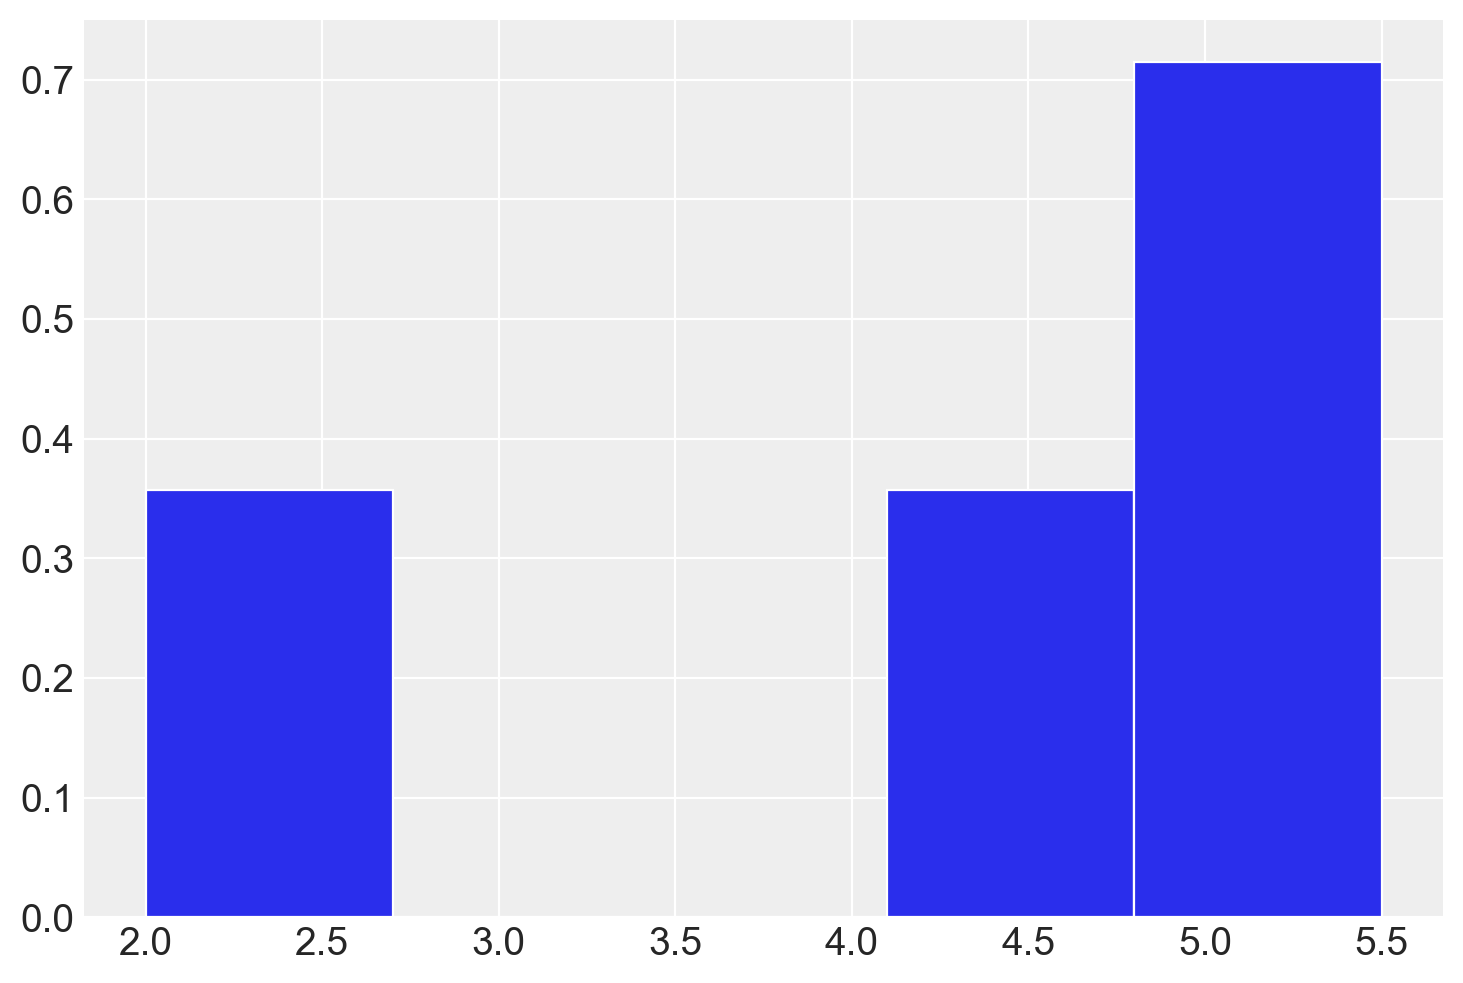

In [58]:
plt.hist(x, bins=5, density=True)
plt.show()

Calcoliamo la media e la varianza della popolazione.

In [4]:
np.mean(x)

4.25

In [5]:
np.var(x, ddof=0) 

1.8125

Estraiamo ora dalla popolazione tutti i possibili campioni di ampiezza $n$ = 2.

In [6]:
# Create an array with all the pairs of possible values
samples = np.array(list(itertools.product(x, repeat=2)))
print(samples)

[[2.  2. ]
 [2.  4.5]
 [2.  5. ]
 [2.  5.5]
 [4.5 2. ]
 [4.5 4.5]
 [4.5 5. ]
 [4.5 5.5]
 [5.  2. ]
 [5.  4.5]
 [5.  5. ]
 [5.  5.5]
 [5.5 2. ]
 [5.5 4.5]
 [5.5 5. ]
 [5.5 5.5]]


Per creare un array con tutte le possibili coppie di valori che possono essere estratti dall'array `x`, utilizziamo la funzione `product` del modulo `itertools`. Impostiamo l'argomento `repeat` a 2 per indicare che vogliamo coppie di valori. Successivamente, convertiamo la lista di tuple risultante in un array NumPy utilizzando la funzione `np.array`, e infine stampiamo il risultato. L'output ottenuto sarà un array con 16 righe e 2 colonne, che rappresenta tutte le possibili coppie di valori che possono essere estratti dall'array `x`.Calcoliamo ora la media di ogni campione di ampiezza $n$ = 2. L'insieme di tali valori costituisce la distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`.

In [7]:
# Create an array with the mean of each sample
means = np.mean(samples, axis=1)
print(means)

[2.   3.25 3.5  3.75 3.25 4.5  4.75 5.   3.5  4.75 5.   5.25 3.75 5.
 5.25 5.5 ]


Queste istruzioni calcolano la media della variabile `samples` lungo l'asse 1, ovvero per ogni riga. Il risultato viene assegnato alla variabile `means`. 

In altre parole, se `samples` è un array bidimensionale dove le righe rappresentano i diversi campioni e le colonne rappresentano le osservazioni all'interno di ogni campione, allora `means` sarà un array unidimensionale contenente la media di ogni campione.

I valori elencati sopra costituiscono la distribuzione delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. Una rappresentazione grafica di tale distribuzione è fornita qui sotto.

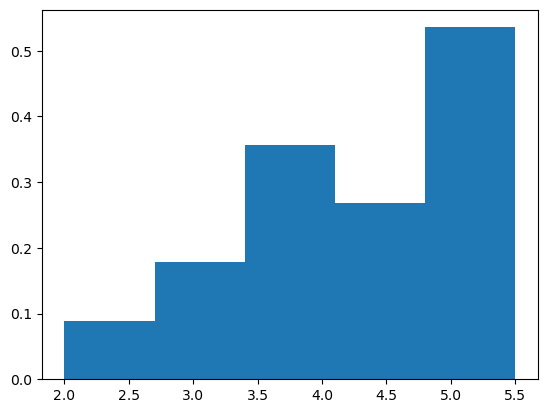

In [52]:
plt.hist(means, bins=5, density=True)
plt.show()

Calcoliamo ora la media della distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. Sappiamo che, se la variabile $X$ è distribuita con media $\mu$ e varianza $\sigma^2$, allora la media della distribuzione dei campioni casuali indipendenti di ampiezza $n$ = 2 sarà

$$
\mathbb{E}(\bar{X}) = \mu.
$$

Verifichiamo.

In [9]:
np.mean(x)

4.25

In [4]:
np.mean(means)

4.25

Sappiamo inoltre che la varianza della distribuzione dei campioni casuali indipendenti di ampiezza $n$ = 2 sarà

$$
\mathbb{V}(\bar{X}) = \frac{\sigma^2}{n}.
$$

Verifichiamo.

In [10]:
np.var(x, ddof=0) / 2

0.90625

In [11]:
np.var(means, ddof=0) 

0.90625

In [13]:
observed_sample = np.array([5, 5.5])
print(observed_sample)

[5.  5.5]


In [16]:
sample_mean = np.mean(observed_sample)
print(sample_mean)

5.25


In [14]:
sample_sd = np.std(observed_sample, ddof=1)
print(sample_sd)

0.3535533905932738


In [15]:
np.std(x, ddof=0)

1.346291201783626

Supponiamo che l'ipotesi nulla affermi che la media della popolazione è 4.5. Supponiamo inoltre che sia sensato pensare che i dati provengano da una popolazione Normale. Se ciò fosse vero, allora le medie dei campioni di ampiezza $n$ = 2 si distribuirebbero secondo la legge Normale con media 4.5 e $\sigma_{\bar{X}} = \frac{\sigma^2}{\sqrt{2}}$.

Si noti che la media della distribuzione campionaria delle medie è specificata dall'ipotesi nulla. Si noti inoltre che non conosciamo $\sigma$.  Tuttavia, $\sigma$ può essere stimato da $s$.

## Test dell'ipotesi nulla

Con queste informazioni possiamo standardizzare la media osservata all'interno della distribuzione campionaria delle medie.

In [39]:
null_mean = 4.0
T = (sample_mean - null_mean) / (sample_sd / np.sqrt(2))
print(T)

5.0


Un teorema statistico importante dimostra che la statistica appena calcolata segue una distribuzione nota, conosciuta come distribuzione $t$ di Student con $\nu = n - 1$ gradi di libertà.

Ci interessa capire quanto sia "lontano" il valore osservato della statistica $T$ dal suo valore atteso. Nella distribuzione $t$ di Student, il valore atteso è 0. Per valutare questa "distanza", calcoliamo la probabilità di osservare, nella distribuzione $T$ con $\nu = n -1$ gradi di libertà, un valore $T$ uguale a quello trovato nel campione o addirittura più estremo, nelle due code della distribuzione.

Iniziamo a calcolare la probabilità nella coda di sinistra.

In [42]:
df = 1 # gradi di libertà
# Calcolo della probabilità nella coda a sinistra
stats.t.cdf(-T, df)

0.06283295818900117

Dato che la distribuzione $t$ di Student è simmetrica, la probabilità nelle due code è uguale a 

In [43]:
2 * stats.t.cdf(-T, df)

0.12566591637800234

## Valore-p

Il valore ottenuto è denominato valore-$p$ e rappresenta la probabilità di osservare un valore della media (in questo caso) uguale o ancora più estremo di quello osservato nel campione, all'interno della distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 estratti dalla popolazione di interesse. In base all'ipotesi nulla, la media della popolazione è specificata, mentre la varianza campionaria viene utilizzata come stima della varianza.

## Decisione statistica

Se il valore-$p$ è basso, significa che la media campionaria osservata è molto distante dal valore atteso previsto dall'ipotesi nulla. Quando la statistica campionaria $T$ produce un valore-$p < 0.05$, il risultato del test statistico è definito "statisticamente significativo", e l'ipotesi nulla viene rigettata. L'ipotesi nulla viene rigettata perché si aspetta che i valori delle medie dei campioni siano concentrati attorno al valore atteso ipotizzato, ma il campione osservato ha una media campionaria molto diversa da quella prevista da $H_0$. Pertanto, sulla base dei dati campionari, l'ipotesi nulla risulta poco plausibile.

Nel caso dell'esempo presente, il valore-p è maggiore della soglia dello 0.05. Pertanto il risultato non è "statisticamente significativo". Dunque, l'ipotesi nulla che affermava che i dati osservati costituiscono un campione casuale estratto da una popolazione di media $\mu$ = 4.0 risulta plausibile e non può essere rigettata.

## Test $t$ di Student

Il test statistico che abbiamo appena eseguito si chiama test $t$ di Student per un campione. Il suo uso più comune riguarda il caso in cui abbiamo dei dati appaiati, per esempio in un pre-test e un post-test. Tra il pre-test e il post-test ci può essere un trattamento di qualche tipo. La differenza tra il pre-test e il post-test è una misura dell'efficacia del trattamento.  Per esempio, consideriamo un trattamento per la depressione. Se il trattamento funziona, i valori di depressione al post-test saranno più piccoli che al pre-test. Pertanto, la differenza de punteggi pre-test - post-test per ciascun partecipante, in media, dovrebbe essere positiva. Se invece il trattamento non funziona, la differenza è statisticamente uguale a zero.

In queste circostanze, l'ipotesi nulla (che il ricercatore vorrebbe rifiutare) afferma che il trattamento non è efficace, ovvero imposta la media dell'ipotesi nulla pari a $\mu$ = 0. Se il ricercatore può rifiutare l'ipotesi nulla (ovvero, se ottiene un risultato "statisticamente significativo", ovvero se ottiene un valore-p minore di 0.05), allora conclude che il trattamento è efficace (se la media post-trattamento è minore della media pre-trattamento).

## Test $t$ di Student con `scipy.stats`

Verifichiamo il risultato numerico ottenuto usando la fuzione `ttest_1samp` di `scipy.stats`.

In [57]:
null_mean = 4.0
stats.ttest_1samp(observed_sample, null_mean)

TtestResult(statistic=5.0, pvalue=0.12566591637800234, df=1)

Abbiamo impostato la media dell'ipotesi nulla a 4.0. Successivamente, chiamiamo la funzione `ttest_1samp`, passando come argomenti l'array di dati `observed_sample` e il valore della media sotto l'ipotesi nulla `null_mean`. La funzione restituisce la statistica $t$ e il valore-p corrispondente. 

Si noti che la funzione `ttest_1samp` assume che i dati siano distribuiti normalmente. Se questa ipotesi viene violata, i risultati del test t non sono validi. 

## Considerazioni conclusive

In questo tutorial abbiamo parlato di tre distribuzioni che sono alla base dell'inferenza frequentista:

1. La distribuzione della popolazione, con media $\mu$ e varianza $\sigma^2$. Questi valori sono spesso ignoti nella pratica.
2. La distribuzione del campione, con media $\bar{x}$ e varianza $s^2$. Questi valori sono noti.
3. La distribuzione campionaria della media, con media $\mu_{\bar{X}} = \mu$ e varianza $\frac{\sigma^2}{n}$. Anche questi valori sono spesso ignoti nella pratica.

Nell'approccio frequentista, la distribuzione campionaria della media viene costruita assumendo una media specificata dall'ipotesi nulla e utilizzando la varianza del campione per stimare la varianza della popolazione. Questo ci permette di specificare completamente la distribuzione campionaria della statistica di interesse. Se il campione è abbastanza grande, la distribuzione campionaria sarà approssimativamente normale grazie al teorema del limite centrale.

Una volta specificata la distribuzione campionaria della statistica di interesse (in questo caso, la media del campione), l'approccio frequentista calcola il valore "standardizzato" della media del campione all'interno della distribuzione campionaria costruita assumendo vera l'ipotesi nulla.

Il test di ipotesi consiste nel confronto tra il valore "standardizzato" della media del campione e la media della distribuzione campionaria costruita assumendo vera l'ipotesi nulla. Se la distanza tra questi due valori è grande, l'approccio frequentista conclude che l'ipotesi nulla non è plausibile.


